In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [3]:
backend = Aer.get_backend('statevector_simulator')

In [42]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([2,1,1])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [39]:
a=np.array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]],dtype=complex)
b=np.array([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],dtype=complex)
c=np.array([[0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0]],dtype=complex)
sv=1./np.sqrt(2)*(a+0*b+c).flatten()

Optimization terminated successfully.
         Current function value: 0.875000
         Iterations: 4
         Function evaluations: 13


(0.0, 1.0)

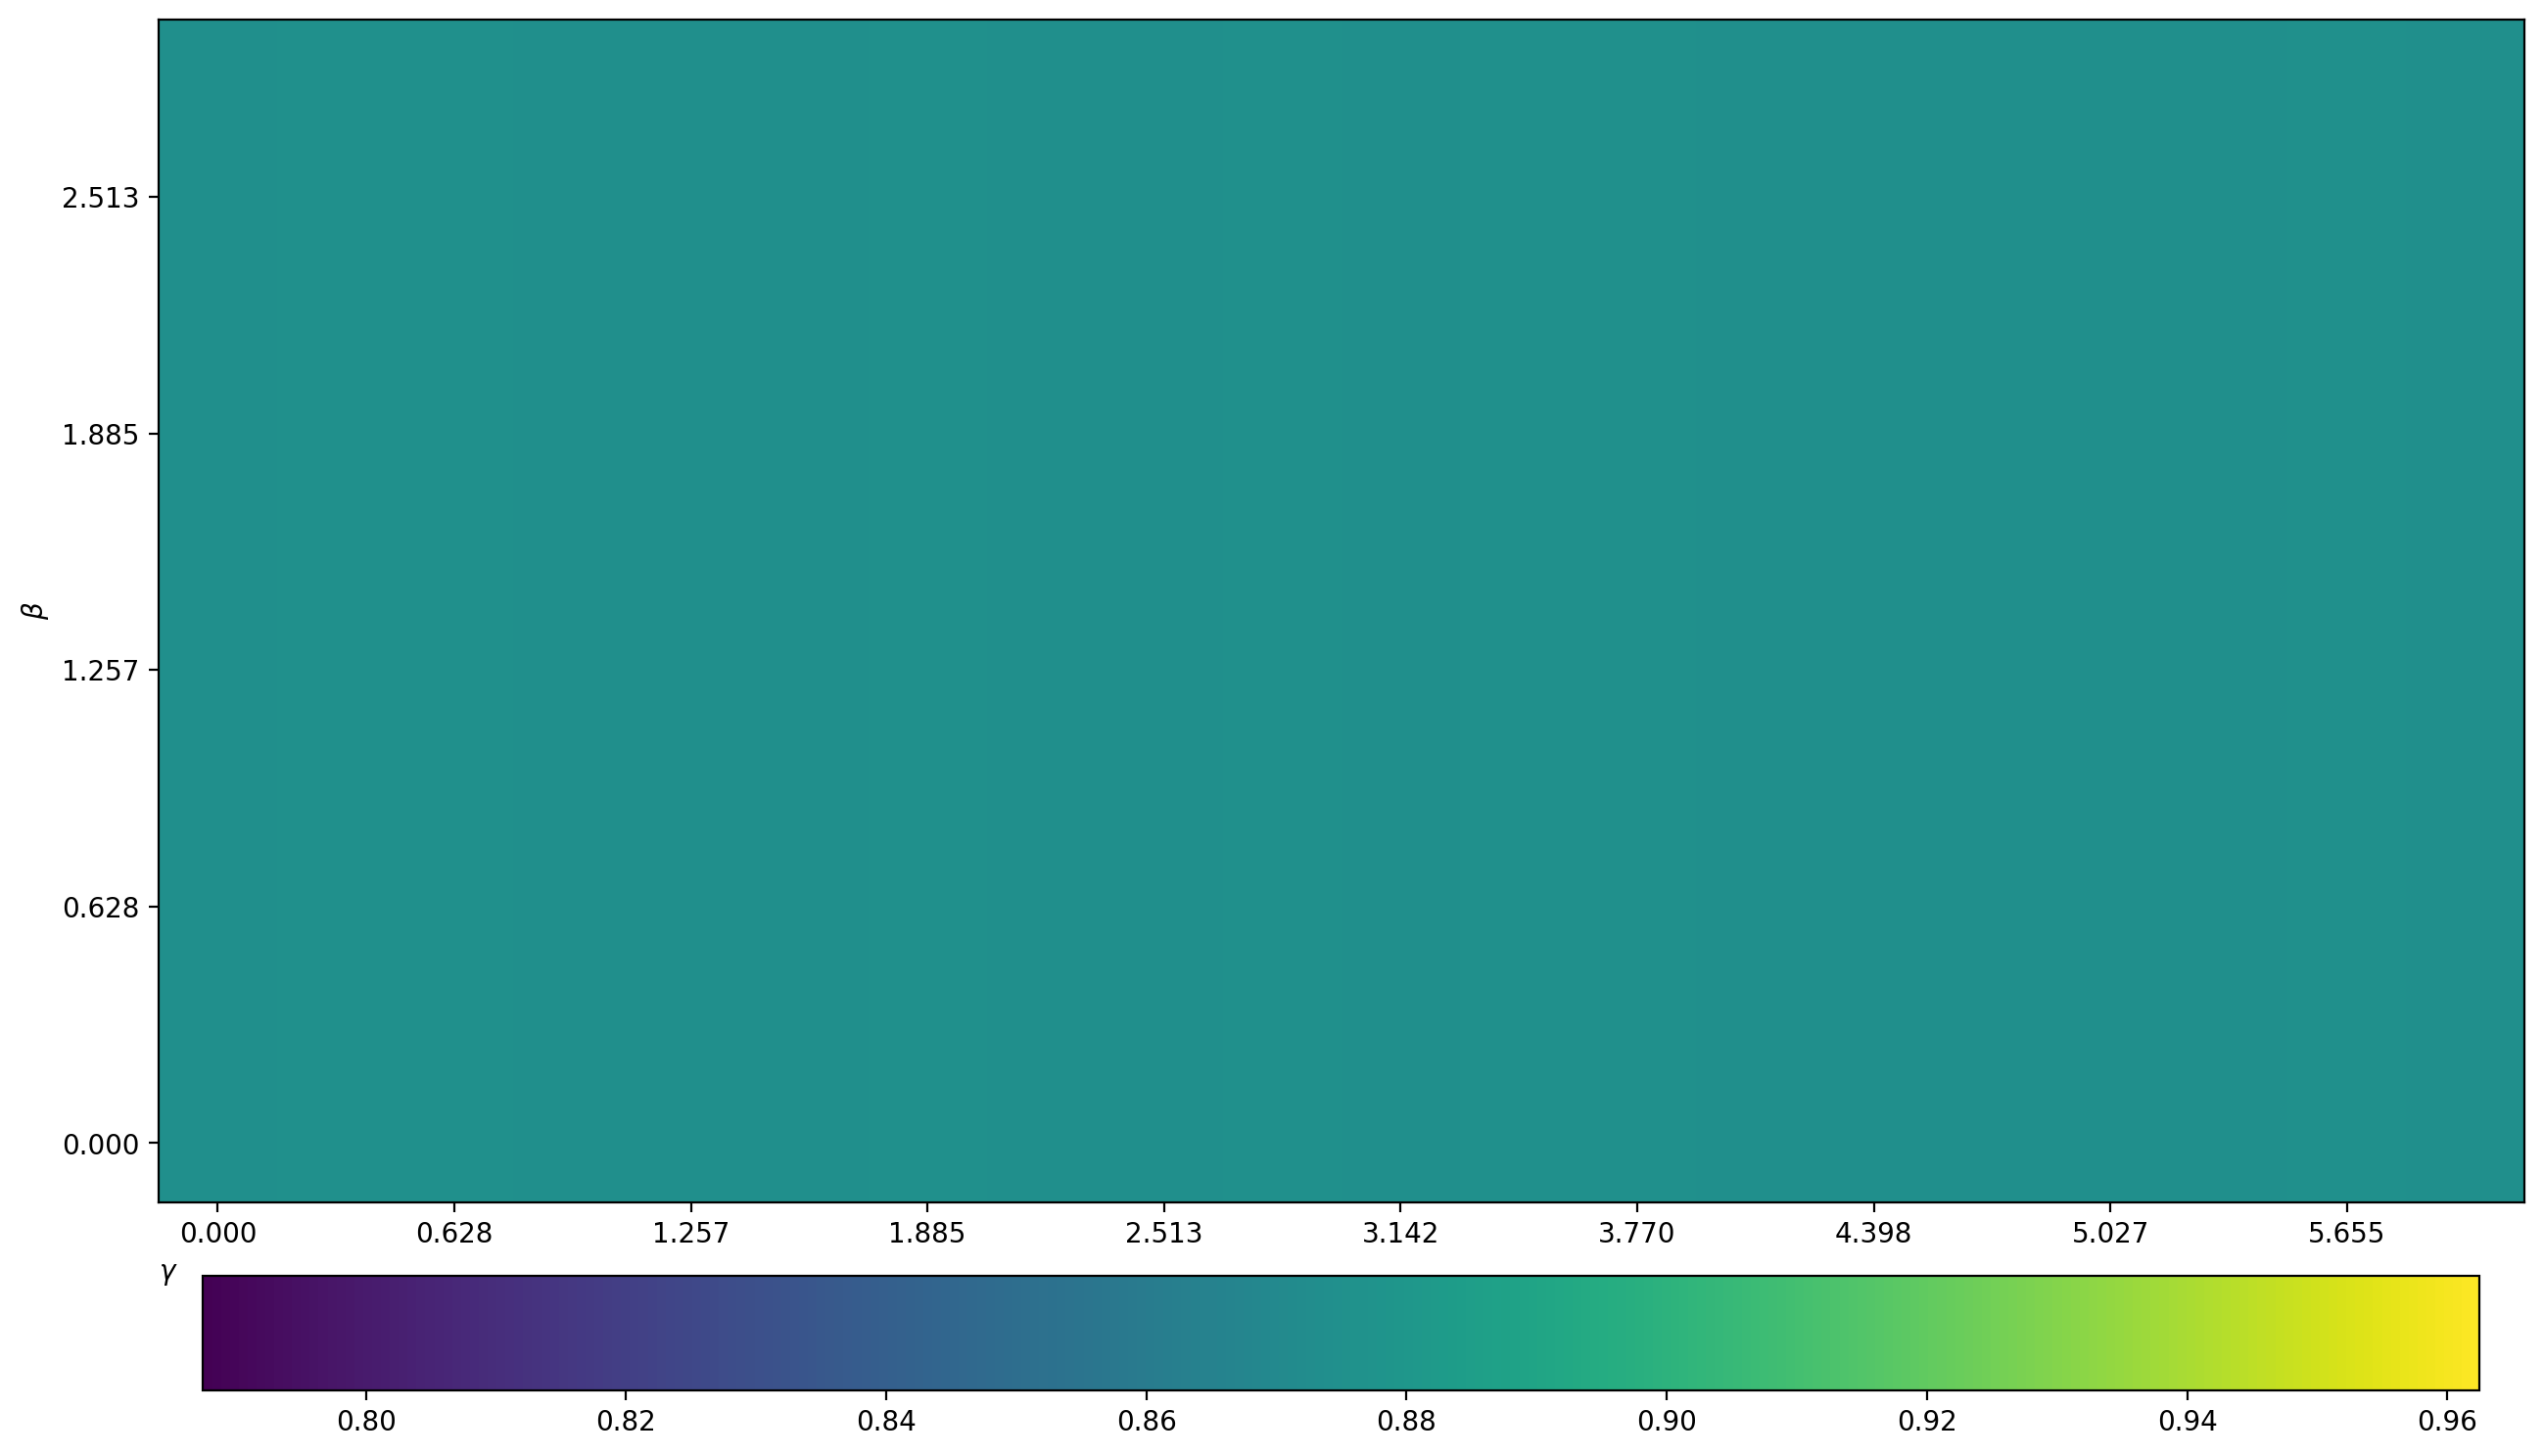

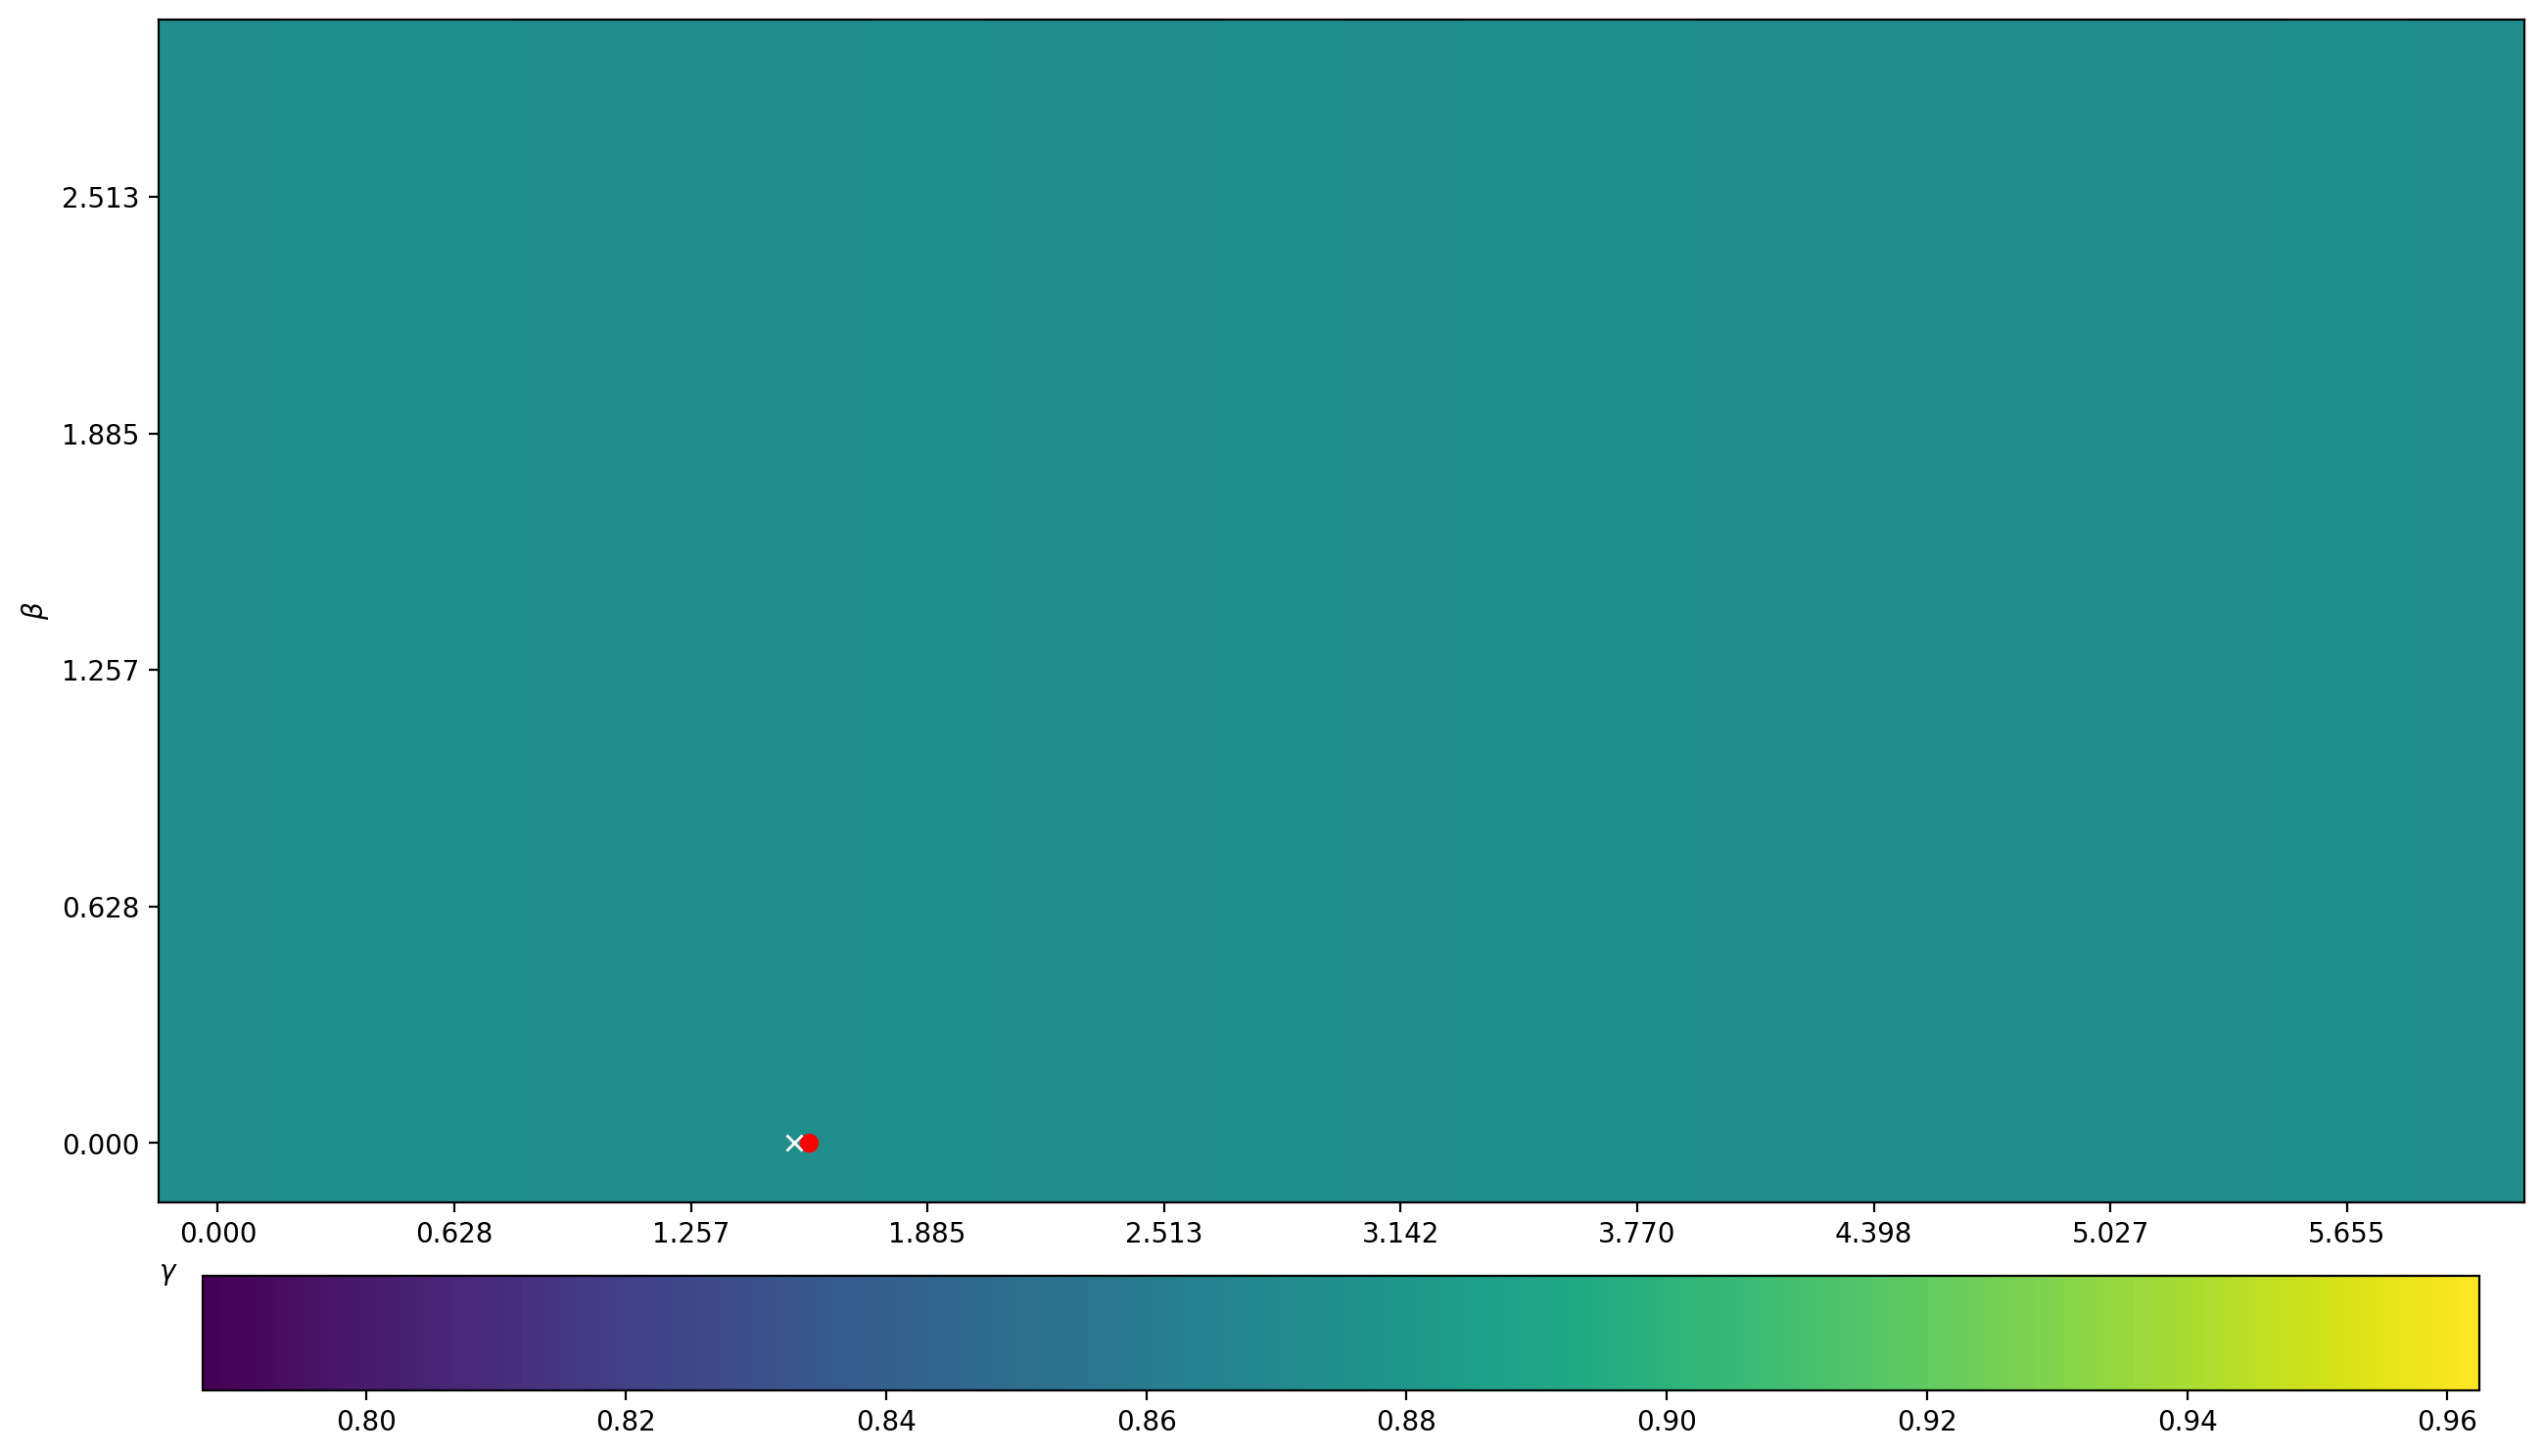

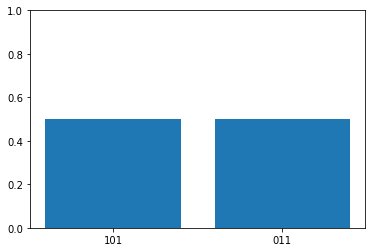

In [44]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixerbinstring='001<->110',ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixerbinstring='001<->110')

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [35]:
qaoa.createCircuit(x0, useExco=[False],sv=sv,mixerbinstring='001<->110').draw()

┌──────────────────────────────────────────┐┌─────────┐           
q_0: ┤0                                         ├┤ Rz(π/5) ├───────────
     │                                          │├─────────┤           
q_1: ┤1 Initialize(0,0,0,0,0,0.70711,0.70711,0) ├┤ Rz(π/5) ├───────────
     │                                          │├─────────┴┐┌────────┐
q_2: ┤2                                         ├┤ Rz(2π/5) ├┤ Rx(-π) ├
     └──────────────────────────────────────────┘└──────────┘└────────┘